In [1]:
using CSV;
using LinearAlgebra;
using Distributions;
using Random;
using Plots;

In [2]:
df = CSV.read("./data_proj_414.csv", 
    delim = ',',
    types=Dict(
        "Potter"=>Bool,
        "Weasley"=>Bool,
        "Granger"=>Bool,
        "Trip"=>Int,
        "Close"=>Int,
        "Far"=>Int));

In [3]:
title = names(df)

9-element Array{Symbol,1}:
 :Column1
 :X      
 :Y      
 :Potter 
 :Weasley
 :Granger
 :Trip   
 :Close  
 :Far    

In [4]:
println(title)

Symbol[:Column1, :X, :Y, :Potter, :Weasley, :Granger, :Trip, :Close, :Far]


In [5]:
data = df;
data_X = data[:,2];
data_Y = data[:,3];
data_Potter = data[:,4];
data_Weasley = data[:,5];
data_Granger = data[:,6];
data_Trip = data[:,7];
data_Close = data[:,8];
data_Far = data[:,9];

In [13]:
data_Far[1:6]

6-element Array{Int64,1}:
 0
 0
 0
 0
 0
 0

In [7]:
# function DataSplite(aim1,aim2,mask,keep)
#     # len(aim1) == len(aim2) == ...
#     # cut aim with mask and keep the number "keep" in the position of mask
#     # usage: P_X, P_Y = DataSplite(data_X,data_Y,data_Potter,1);
#     new_list1 = []
#     new_list2 = []
#     for i = 1 : length(aim1)
#         if mask[i] == keep
# #             new_list.appends(aim[i])
#             push!(new_list1,aim1[i])
#             push!(new_list2,aim2[i])
            
#         end
#     end
#     return new_list1, new_list2
# end

In [8]:
function ListDataSplite(aims,mask,keep)
    # cut aim with mask and keep the number "keep" in the position of mask
    # usage: P = ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Potter,1);
    keep_list = []
    for aim in aims
        new_list = []
        for i = 1 : length(aim)
            if mask[i] == keep
                push!(new_list,aim[i])
            end
        end
        push!(keep_list,new_list)
    end
    return keep_list
end

ListDataSplite (generic function with 1 method)

In [15]:
P = ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Potter,1);
W = ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Weasley,1);
G = ListDataSplite([data_X,data_Y,data_Trip,data_Close,data_Far],data_Granger,1);

In [10]:
P

5-element Array{Any,1}:
 Any[2.46628, 5.50834, 6.78448, 7.5505, 10.4021, 12.2428, 13.3996, 14.7127, 15.4624, 15.6429  …  75.1843, 74.2159, 73.3331, 72.4161, 72.5179, 73.6192, 74.0957, 75.0824, 74.5459, 76.2333] 
 Any[3.58212, 8.29571, 11.8514, 14.4118, 17.2181, 21.6676, 24.3296, 26.5969, 28.0332, 30.7124  …  68.2662, 68.3339, 67.9505, 69.9164, 70.6308, 70.6823, 69.7629, 68.9868, 70.0236, 69.7517]
 Any[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0  …  50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0, 50.0]                                                                      
 Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                                                
 Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 4.0, 0.0  …  0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                                                                                

In [17]:
# P_X, P_Y = DataSplite([data_X,data_Y],data_Potter,1);
# W_X, W_Y = DataSplite(data_X,data_Y,data_Weasley,1);
# G_X, G_Y = DataSplite(data_X,data_Y,data_Granger,1);
print(length(data_X),", ",length(P[1]),", ",length(W[2]),", ",length(G[3]),", ",length(P[1])+length(W[2])+length(G[3]))

24094, 8000, 8336, 7758, 24094

In [12]:
Max_trip = 49;
# for 

In [18]:
P_trip = []
for i = 1:Max_trip
    current_trip = ListDataSplite([P[1],P[2],P[4],P[5]],P[3],i);
    push!(P_trip,current_trip)
end

In [19]:
P_trip

49-element Array{Any,1}:
 Any[Any[2.46628, 5.50834, 6.78448, 7.5505, 10.4021, 12.2428, 13.3996, 14.7127, 15.4624, 15.6429  …  49.6019, 48.4438, 47.9917, 48.4805, 47.3463, 46.923, 48.5525, 47.3799, 45.3383, 46.1172], Any[3.58212, 8.29571, 11.8514, 14.4118, 17.2181, 21.6676, 24.3296, 26.5969, 28.0332, 30.7124  …  61.0731, 62.0358, 61.6963, 61.5155, 60.0762, 62.4264, 63.8934, 63.1028, 64.4497, 65.7422], Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0  …  0.0, 4.0, 4.0, 3.0, 1.0, 4.0, 2.0, 6.0, 2.0, 0.0], Any[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 8.0, 4.0, 0.0  …  10.0, 16.0, 17.0, 14.0, 7.0, 18.0, 20.0, 16.0, 11.0, 8.0]] 
 Any[Any[1.63253, 4.4936, 5.07726, 6.82622, 10.7021, 12.005, 13.7473, 16.5189, 18.6068, 21.2856  …  37.5035, 37.442, 37.6403, 36.9281, 37.2929, 37.0765, 38.8718, 37.5732, 37.5706, 37.709], Any[3.24861, 5.68878, 7.9135, 9.63174, 11.7176, 14.808, 18.1658, 21.4188, 24.5362, 28.8115  …  65.0691, 65.5048, 65.3282, 64.2241, 63.3502, 61.9611, 61.0896, 61.7725, 61.7211, 62.195

In [20]:
using Plots

In [34]:
# using Colors
colors = RGBA(0,0,0,0)
typeof(colors)

RGBA{FixedPointNumbers.Normed{UInt8,8}}

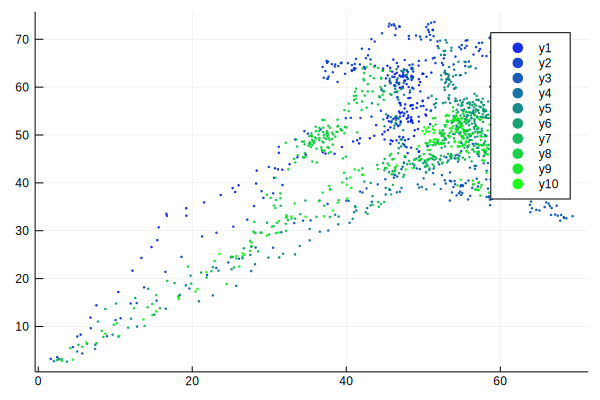

In [58]:
# colors = plt.cm.coolwarm(scaled_z)

# p1 = scatter(P_trip[1][1],P_trip[1][2],markersize = 2,markerstrokewidth = 0,markercolor = RGBA(0,0,1,0.9))
p1 = scatter()
kk = 10 
# kk = Max_trip
for i = 1:kk
    p1 = scatter!(P_trip[i][1],P_trip[i][2],markersize = 1.5,markerstrokewidth = 0,markercolor = RGBA(0,i/kk,1-i/kk,0.9))
end
plot(p1)